<module 'matplotlib.pyplot' from 'c:\\python\\workspace\\pycharm\\venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

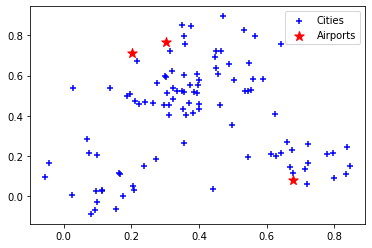

In [205]:
import random
import numpy as np
import math 

num_city = 100
num_air = 3
num_center = 5
sigma = 0.1
cities = set()
airports = []

for i in range(num_center):
    x = random.random()
    y = random.random()
    xc = np.random.normal(x, sigma, num_city//num_center)
    yc = np.random.normal(y, sigma, num_city//num_center)
    cities = cities.union(zip(xc, yc))

for i in range(num_air):
    x = random.random()
    y = random.random()
    airports.append((x,y)) 

import matplotlib.pyplot as plt

zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
plt.legend()
plt

In [206]:
# Calculate the distance between two 2D points
def dist(p1, p2):
    # p1 and p2 are elements from an enumerate object [1][0] is an x value and [1][1] is a y value
    dist = math.sqrt((p2[1][0] - p1[1][0]) ** 2 + (p2[1][1] - p1[1][1]) ** 2)  
    return dist  

In [207]:
# The (x,y) coordinates of all cities are stored in the 'cities' variable as a list of tuples

closest_airports = {}
# Iterate over the inner loop for as many "airports" are available for "construction"
# i[0] returns the iteration index, i[1][0] returns the corresponding x and i[1][1] returns the corresponding y
for i in enumerate(airports):
    print(i)
    # Iterate through all cities and follow the inner iterative function
    # c[0] returns the iteration index, c[1][0] returns the corresponding x and c[1][1] returns the corresponding y
    # Find the closest airport to each city and store the result in a dictionary relative to the index of the city
    # i.e. c[0] = 6 then closest_airport = {6: (i, dist(c, i))}
    for c in enumerate(cities):
        distance = dist(c, i) # Save as variable to reduce calculations below
        # If this is not the first airport being checked
        if i[0] != 0:
            # If this airport has a lesser distance to the previous closer airport, update the closest airport
            if closest_airports[c[0]][1] > distance:
#                 print("New airport closer", closest_airports[c[0]][1], distance)
                closest_airports[c[0]] = (i[0], distance)
            
        # If comparing distance between cities to first airport, set closest airport equal to first airport since there
        # are no other known airports yet.
        else:
            closest_airports[c[0]] = (i[0], distance)
            
            
#         print(c[1][0], c[1][1])
        
#     print('\n\n\n\n\n')
# print(closest_airports)
# print(list(cities)[2])
# print(cities)

(0, (0.30148129742287644, 0.7686890680099937))
(1, (0.20117929669268686, 0.7131094928187304))
(2, (0.6774162247025841, 0.08170063482568246))


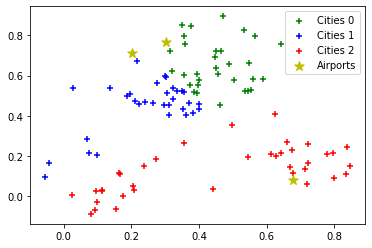

In [208]:
# Color code cities based on their closest airport
airport_map = {0: [], 1: [], 2: []}
for i in closest_airports:
    airport_map[closest_airports[i][0]].append(i)
    
# Separate cities into lists based on their closest airport
a0 = []
a1 = []
a2 = []
for i in range(len(airport_map)):
    for j in range(len(airport_map[i])):
        if i == 0:
            a0.append(list(cities)[airport_map[i][j]])
        elif i == 1:
            a1.append(list(cities)[airport_map[i][j]])
        elif i == 2:
            a2.append(list(cities)[airport_map[i][j]])
            
# Pull out x,y data and plot the data
x0, y0 = zip(*a0)
x1, y1 = zip(*a1)
x2, y2 = zip(*a2)
ax, ay = zip(*airports)
plt.scatter(x0, y0, marker='+',color='g', label='Cities 0')
plt.scatter(x1, y1, marker='+',color='b', label='Cities 1')
plt.scatter(x2, y2, marker='+',color='r', label='Cities 2')
plt.scatter(ax, ay, marker='*', color='y', s=100, label='Airports')
plt.legend()
plt.show()